<a href="https://colab.research.google.com/github/alenabozny/context-augmentation/blob/master/LIWC_LR_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Google Drive to the Notebook. This allows us to load datasets that are copyied to the GD directory.**


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load the dataset (LIWC features for CRED/NONCRED data)**

In [3]:
import pandas as pd
import numpy as np

liwc_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/LIWC_paragrafy.csv", sep=";",decimal=',', header=0)

liwc_data.head()

,Body,Rate,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Statins available in the United States include...,CRED,56,98.29,76.25,2.24,25.77,18.67,33.93,60.71,33.93,7.14,5.36,0.0,1.79,0.0,0.0,3.57,1.79,7.14,14.29,3.57,0.00,1.79,0.0,8.93,7.14,5.36,0.00,5.36,3.57,0.00,0.00,0.00,0.00,0.00,0.0,7.14,0.0,0.0,...,5.36,0.0,0.00,5.36,1.79,1.79,0.00,1.79,0.00,1.79,8.93,0.0,7.14,0.00,5.36,0.00,1.79,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0,44.64,8.93,10.71,0.0,0.0,0.0,0.0,0.00,0.00,0.00,25.00,0.00
1,Statins are one of the most common medicines p...,CRED,53,93.26,93.42,5.35,61.55,17.67,13.21,92.45,50.94,15.09,9.43,0.0,5.66,0.0,0.0,3.77,5.66,7.55,20.75,5.66,3.77,3.77,0.0,15.09,11.32,9.43,0.00,5.66,3.77,1.89,1.89,0.00,0.00,0.00,0.0,11.32,0.0,0.0,...,9.43,0.0,1.89,11.32,5.66,1.89,0.00,3.77,0.00,1.89,11.32,0.0,9.43,0.00,7.55,0.00,1.89,0.0,0.0,0.0,0.0,0.0,3.77,0.0,1.89,1.89,1.89,0,20.75,11.32,7.55,0.0,0.0,0.0,0.0,0.00,0.00,1.89,0.00,0.00
2,They work on an enzyme that is used by our bod...,CRED,84,74.10,90.47,6.50,25.77,21.00,17.86,94.05,50.00,13.10,7.14,0.0,5.95,0.0,0.0,1.19,5.95,5.95,15.48,7.14,3.57,9.52,0.0,13.10,4.76,3.57,0.00,0.00,1.19,4.76,2.38,2.38,1.19,1.19,0.0,9.52,0.0,0.0,...,13.10,0.0,1.19,14.29,5.95,2.38,3.57,1.19,1.19,1.19,10.71,0.0,9.52,0.00,8.33,1.19,2.38,0.0,0.0,0.0,0.0,0.0,2.38,0.0,1.19,1.19,1.19,0,16.67,5.95,8.33,0.0,0.0,0.0,0.0,0.00,0.00,2.38,0.00,0.00
3,"Yep, that’s right…our bodies make cholesterol,...",CRED,76,64.39,85.38,19.27,25.77,19.00,19.74,93.42,50.00,11.84,5.26,0.0,5.26,0.0,0.0,0.00,6.58,5.26,14.47,7.89,5.26,10.53,0.0,11.84,5.26,3.95,2.63,0.00,1.32,5.26,2.63,2.63,1.32,1.32,0.0,7.89,0.0,0.0,...,13.16,0.0,1.32,13.16,5.26,1.32,3.95,1.32,1.32,0.00,9.21,0.0,13.16,1.32,10.53,1.32,1.32,0.0,0.0,0.0,0.0,0.0,2.63,0.0,1.32,1.32,1.32,0,18.42,6.58,9.21,0.0,0.0,0.0,0.0,0.00,0.00,2.63,0.00,0.00
4,That’s because cholesterol is vital for our su...,CRED,101,92.29,61.69,29.80,1.00,25.25,18.81,83.17,43.56,5.94,1.98,0.0,1.98,0.0,0.0,0.00,3.96,7.92,14.85,4.95,3.96,8.91,0.0,6.93,4.95,2.97,1.98,2.97,0.99,5.94,0.99,4.95,1.98,1.98,0.0,3.96,0.0,0.0,...,10.89,0.0,0.00,10.89,1.98,0.99,4.95,0.00,2.97,0.99,4.95,0.0,13.86,0.99,8.91,3.96,1.98,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0,20.79,3.96,3.96,0.0,0.0,0.0,0.0,0.99,1.98,0.99,5.94,2.97


In [5]:
liwc_data_paragraphs = liwc_data[0:1917:3]

def y_to_binary(Y):
  def label_to_0_1(lbl):
    if lbl=='CRED':
      return 1
    else:
      return 0

  Y_mapped = map(label_to_0_1, Y)
  return np.array(list(Y_mapped))

In [6]:
np.shape(liwc_data_paragraphs)

(639, 95)

In [7]:
!pip install spacytextblob

  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


# The Model
Features:
- TFIDF
- NER
- POS
- LIWC
- sentiment

In [8]:
from sklearn.pipeline import Pipeline
# from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing as p

VALIDATION_SPLIT = 0.1

data = liwc_data_paragraphs
Y = data['Rate']
Y = y_to_binary(Y)

np.shape(Y)

(639,)

### **TFIDF**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk

nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk import word_tokenize, sent_tokenize

corpus = data['Body']
corpus_removed_numbers = [re.sub(r'\d+', '', s) for s in corpus]

corpus_tokenized = []
stemmer= PorterStemmer()

for s in corpus_removed_numbers:
  tokens = word_tokenize(s)
  stemmed_tokens = [stemmer.stem(word) for word in tokens]
  corpus_tokenized.append(" ".join(stemmed_tokens))

vectorizer = TfidfVectorizer()
X_tfidf_array = vectorizer.fit_transform(corpus_tokenized)
X_tfidf_array = np.array(X_tfidf_array.toarray())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
X_tfidf = pd.DataFrame(X_tfidf_array, columns=vectorizer.get_feature_names())

In [11]:
X_tfidf

,aaic,abat,abb,abdomen,aberr,abil,abl,abnorm,about,abov,abramson,absenc,absolut,absorb,absorpt,abstract,abus,academ,academi,acc,acceler,accept,access,accid,accommod,accompani,accomplish,accord,accordingli,account,accumul,accur,accus,acd,ach,achiev,acid,acids,acknowledg,acquir,...,worst,worth,worthless,worthwhil,would,wound,wreak,wrestl,write,written,wrong,wrongli,wrot,wrote,wrought,www,xl,ye,year,years,yellow,yep,yet,yield,yo,yoghurt,yogurt,yolk,york,you,young,younger,your,yourself,zealand,zealou,zero,zetia,zinc,zocor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.182091
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.127494,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.193231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376987,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128173,0.0,0.0,0.354019,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283935,0.0,0.0,0.174276,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157283,0.000000,0.0,0.0

##**NER**

In [12]:
import spacy
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

X_ner_counters = []
X_ner_array = []
meta_counter = Counter()
nlp = en_core_web_sm.load()

for s in corpus:
  doc = nlp(s)
  labels = [x.label_ for x in doc.ents]
  X_ner_counters.append(Counter(labels))
  meta_counter += Counter(labels)

for c in X_ner_counters:
  X_ner_array.append([c[key] for key in list(meta_counter.keys())])

X_ner = pd.DataFrame(X_ner_array, columns=list(meta_counter.keys()))

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [13]:
X_ner

,ORG,GPE,PERSON,CARDINAL,PERCENT,DATE,ORDINAL,LOC,PRODUCT,NORP,TIME,QUANTITY,EVENT,LAW,MONEY,WORK_OF_ART,FAC,LANGUAGE
0,4,5,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,1,4,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
635,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **LIWC**

In [14]:
# important_features = get_n_most_important(50)
X_liwc = data.loc[:,'WC':]
X_liwc = X_liwc.reset_index(drop=True)

In [15]:
X_liwc

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,56,98.29,76.25,2.24,25.77,18.67,33.93,60.71,33.93,7.14,5.36,0.0,1.79,0.00,0.00,3.57,1.79,7.14,14.29,3.57,0.00,1.79,0.00,8.93,7.14,5.36,0.00,5.36,3.57,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.0,0.0,0.00,0.00,...,5.36,0.0,0.00,5.36,1.79,1.79,0.00,1.79,0.00,1.79,8.93,0.00,7.14,0.00,5.36,0.00,1.79,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0,44.64,8.93,10.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,0.00
1,76,64.39,85.38,19.27,25.77,19.00,19.74,93.42,50.00,11.84,5.26,0.0,5.26,0.00,0.00,0.00,6.58,5.26,14.47,7.89,5.26,10.53,0.00,11.84,5.26,3.95,2.63,0.00,1.32,5.26,2.63,2.63,1.32,1.32,0.00,7.89,0.0,0.0,0.00,0.00,...,13.16,0.0,1.32,13.16,5.26,1.32,3.95,1.32,1.32,0.00,9.21,0.00,13.16,1.32,10.53,1.32,1.32,0.00,0.0,0.0,0.0,0.00,2.63,0.0,1.32,1.32,1.32,0,18.42,6.58,9.21,0.00,0.00,0.00,0.00,0.00,0.00,2.63,0.00,0.00
2,81,89.09,54.90,79.42,10.27,27.00,18.52,82.72,44.44,6.17,0.00,0.0,0.00,0.00,0.00,0.00,6.17,7.41,14.81,6.17,6.17,7.41,0.00,7.41,6.17,4.94,2.47,7.41,2.47,6.17,2.47,3.70,1.23,1.23,0.00,3.70,0.0,0.0,0.00,0.00,...,3.70,0.0,0.00,9.88,0.00,2.47,3.70,1.23,2.47,7.41,2.47,0.00,20.99,1.23,7.41,12.35,2.47,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0,18.52,3.70,0.00,0.00,0.00,0.00,0.00,1.23,2.47,0.00,7.41,3.70
3,74,76.55,55.37,78.21,25.77,24.67,20.27,89.19,50.00,9.46,4.05,0.0,0.00,0.00,0.00,4.05,5.41,4.05,17.57,5.41,4.05,10.81,2.70,10.81,6.76,4.05,2.70,1.35,4.05,2.70,1.35,1.35,0.00,0.00,0.00,10.81,0.0,0.0,1.35,0.00,...,5.41,0.0,1.35,6.76,0.00,0.00,2.70,4.05,0.00,0.00,9.46,0.00,13.51,0.00,9.46,2.70,2.70,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0,9.46,2.70,4.05,0.00,0.00,1.35,0.00,0.00,0.00,0.00,0.00,1.35
4,97,89.88,66.01,10.29,1.00,32.33,24.74,89.69,41.24,5.15,0.00,0.0,0.00,0.00,0.00,0.00,5.15,4.12,16.49,5.15,6.19,7.22,0.00,11.34,5.15,3.09,4.12,2.06,3.09,8.25,0.00,8.25,0.00,0.00,1.03,8.25,0.0,0.0,0.00,0.00,...,14.43,0.0,2.06,8.25,1.03,1.03,4.12,1.03,2.06,2.06,8.25,1.03,7.22,1.03,4.12,2.06,5.15,2.06,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0,17.53,3.09,4.12,0.00,1.03,0.00,1.03,1.03,4.12,0.00,2.06,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,23,60.05,9.62,54.89,1.00,7.67,47.83,78.26,34.78,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,13.04,13.04,8.70,4.35,4.35,17.39,17.39,4.35,0.00,0.00,4.35,4.35,0.00,4.35,4.35,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,8.70,0.0,0.00,21.74,0.00,0.00,17.39,0.00,4.35,4.35,21.74,0.00,8.70,0.00,8.70,0.00,8.70,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0,21.74,13.04,4.35,0.00,0.00,0.00,0.00,0.00,0.00,4.35,0.00,0.00
635,122,88.55,97.50,46.61,1.00,15.25,28.69,91.80,39.34,11.48,10.66,0.0,0.00,9.84,0.00,0.82,0.82,2.46,17.21,4.10,2.46,4.92,0.82,9.02,13.11,4.92,0.82,0.00,0.00,14.75,2.46,12.30,6.56,0.00,5.74,12.30,0.0,0.0,0.00,0.00,...,14.75,0.0,4.92,22.13,0.82,0.00,13.11,1.64,6.56,0.82,6.56,0.82,19.67,0.82,18.03,0.82,6.56,1.64,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0,20.49,10.66,1.64,4.92,0.00,0.00,0.00,0.00,0.00,3.28,0.00,0.00
636,46,20.26,98.44,16.76,1.00,15.33,21.74,91.30,43.48,15.22,10.87,0.0,0.00,10.87,0.00,0.00,4.35,0.00,6.52,8.70,4.35,10.87,0.00,8.70,6.52,0.00,0.00,0.00,2.17,6.52,0.00,6.52,2.17,0.00,0.00,17.39,0.0,0.0,0.00,0.00,...,10.87,0.0,0.00,17.39,4.35,0.00,13.04,0.00,4.35,2.17,13.04,0.00,10

### **Sentiment**

In [16]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

X_sentiment_array = []
for s in corpus:
  doc = nlp(s)
  X_sentiment_array.append([doc._.sentiment.polarity,
                     doc._.sentiment.subjectivity]
                     )
  
X_sentiment = pd.DataFrame(X_sentiment_array, columns=["polarity", "subjectivity"])

/usr/local/lib/python3.7/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [17]:
X_sentiment

,polarity,subjectivity
0,0.275000,0.475000
1,0.242000,0.428000
2,0.026124,0.485582
3,0.118707,0.569728
4,0.008482,0.523214
...,...,...
634,0.230000,0.495000
635,0.109286,0.519560
636,0.097333,0.449333
637,0.264000,0.431385


In [18]:
X = pd.concat([X_liwc, X_ner, X_tfidf, X_sentiment], axis=1)
X

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,...,worthless,worthwhil,would,wound,wreak,wrestl,write,written,wrong,wrongli,wrot,wrote,wrought,www,xl,ye,year,years,yellow,yep,yet,yield,yo,yoghurt,yogurt,yolk,york,you,young,younger,your,yourself,zealand,zealou,zero,zetia,zinc,zocor,polarity,subjectivity
0,56,98.29,76.25,2.24,25.77,18.67,33.93,60.71,33.93,7.14,5.36,0.0,1.79,0.00,0.00,3.57,1.79,7.14,14.29,3.57,0.00,1.79,0.00,8.93,7.14,5.36,0.00,5.36,3.57,0.00,0.00,0.00,0.00,0.00,0.00,7.14,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.182091,0.275000,0.475000
1,76,64.39,85.38,19.27,25.77,19.00,19.74,93.42,50.00,11.84,5.26,0.0,5.26,0.00,0.00,0.00,6.58,5.26,14.47,7.89,5.26,10.53,0.00,11.84,5.26,3.95,2.63,0.00,1.32,5.26,2.63,2.63,1.32,1.32,0.00,7.89,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.193231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.242000,0.428000
2,81,89.09,54.90,79.42,10.27,27.00,18.52,82.72,44.44,6.17,0.00,0.0,0.00,0.00,0.00,0.00,6.17,7.41,14.81,6.17,6.17,7.41,0.00,7.41,6.17,4.94,2.47,7.41,2.47,6.17,2.47,3.70,1.23,1.23,0.00,3.70,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376987,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.026124,0.485582
3,74,76.55,55.37,78.21,25.77,24.67,20.27,89.19,50.00,9.46,4.05,0.0,0.00,0.00,0.00,4.05,5.41,4.05,17.57,5.41,4.05,10.81,2.70,10.81,6.76,4.05,2.70,1.35,4.05,2.70,1.35,1.35,0.00,0.00,0.00,10.81,0.0,0.0,1.35,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.118707,0.569728
4,97,89.88,66.01,10.29,1.00,32.33,24.74,89.69,41.24,5.15,0.00,0.0,0.00,0.00,0.00,0.00,5.15,4.12,16.49,5.15,6.19,7.22,0.00,11.34,5.15,3.09,4.12,2.06,3.09,8.25,0.00,8.25,0.00,0.00,1.03,8.25,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008482,0.523214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,23,60.05,9.62,54.89,1.00,7.67,47.83,78.26,34.78,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,13.04,13.04,8.70,4.35,4.35,17.39,17.39,4.35,0.00,0.00,4.35,4.35,0.00,4.35,4.35,0.00,0.00,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.230000,0.495000
635,122,88.55,97.50,46.61,1.00,15.25,28.69,91.80,39.34,11.48,10.66,0.0,0.00,9.84,0.00,0.82,0.82,2.46,17.21,4.10,2.46,4.92,0.82,9.02,13.11,4.92,0.82,0.00,0.00,14.75,2.46,12.30,6.56,0.00,5.74,12.30,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128173,0.0,0.0,0.354019,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.109286,0.519560
636,46,20.26,98.44,16.76,1.00,15.33,21.74,91.30,43.48,15.22,10.87,0.0,0.00,10.87,0.00,0.00,4.35,0.00,6.52,8.70,4.35,10.87,0.00,8.70,6.52,0.00,0.00,0.00,2.17,6.52,0.00,6.52,2.17,0.00,0.00,17.39,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.preprocessing as p

min_max_scaler = p.MinMaxScaler()
standard_scaler = p.StandardScaler()
scaled_features = standard_scaler.fit_transform(X)
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

def eval_and_print_metrics(clf, X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # print("F1 score on test set: "
          # "%0.3f" % metrics.f1_score(y_test, y_pred, average='weighted'))
    # print("-" * 10)
    return metrics.f1_score(y_test, y_pred, average='weighted')

clf = MLPClassifier(max_iter=3000, solver='adam', hidden_layer_sizes=(50,20))
# clf = LogisticRegression(max_iter=10000)

f1s = []
for i in range(0,20):
  f1s.append(eval_and_print_metrics(clf, scaled_features_df, Y))

print("Mean weighted f1: ", np.mean(f1s), " STD: ", np.std(f1s))

Mean weighted f1:  0.6336425473545855  STD:  0.06341619232208226


## Fit and show AUC

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def fit_clf_and_show_ROC(clf, X, Y, VALIDATION_SPLIT=0.2):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)
  clf.fit(X_train, y_train)

  clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Positive class classification (area = %0.2f)' % clf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  from sklearn.metrics import classification_report
  
  print(classification_report(y_test, clf.predict(X_test)))

# RFE

In [26]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

def get_n_most_important(num_features, X, Y):
  model = LogisticRegression(max_iter=10000)
  rfe = RFECV(model, num_features, verbose=0)
  fit = rfe.fit(X, Y)

  # print("Num Features: %s" % (fit.n_features_))
  # print("Selected Features: %s" % (fit.support_))
  # print("Feature Ranking: %s" % (fit.ranking_))

  features = X.columns.values
  important_features = []

  for f in list(zip(features, fit.support_)):
    if f[1]:
      important_features.append(f[0])

  return fit.support_, fit.n_features_, fit.ranking_, important_features

In [ ]:
import matplotlib.pyplot as plt

N = 3465
interval = 100

mean_f1 = []
iter_range = range(100, N, interval)
clf = LogisticRegression()

for i in iter_range:
  print('Num features: %i' %i)
  sup, n_ftrs, rank, important_features = get_n_most_important(i, X, Y)
  X_sliced = X[important_features]
  f1 = eval_and_print_metrics(clf, X_sliced, Y)
  # mean_accuracies.append(acc)
  mean_f1.append(f1)

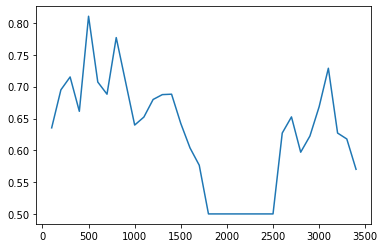

In [ ]:
plt.figure()
plt.plot(iter_range,mean_f1, label='F1 change by number of features in LogisticRegression model')
plt.show()

In [50]:
sup, n_ftrs, rank, important_features = get_n_most_important(100, X, Y)

In [30]:
print(important_features)

['pronoun', 'you', 'shehe', 'they', 'affect', 'posemo', 'family', 'friend', 'male', 'see', 'feel', 'affiliation', 'reward', 'risk', 'focusfuture', 'home', 'money', 'informal', 'assent', 'nonflu', 'SemiC', 'QMark', 'Exclam', 'ORG', 'GPE', 'NORP', 'TIME', 'EVENT', 'LAW', 'MONEY', 'WORK_OF_ART', 'LANGUAGE', 'abil', 'about', 'abov', 'absolut', 'accept', 'accid', 'acid', 'across', 'activ', 'actual', 'addit', 'advanc', 'advis', 'against', 'age', 'aim', 'al', 'alon', 'alreadi', 'also', 'although', 'among', 'amount', 'an', 'analys', 'ani', 'anim', 'antioxid', 'appar', 'appear', 'arora', 'arteri', 'assess', 'asterisk', 'at', 'atorvastatin', 'attack', 'attent', 'away', 'balanc', 'be', 'becam', 'becaus', 'becom', 'been', 'began', 'behind', 'below', 'between', 'bile', 'blame', 'blood', 'book', 'bound', 'bowden', 'bring', 'brodi', 'build', 'buildup', 'can', 'cancer', 'case', 'caus', 'certain', 'chanc', 'chang', 'check', 'chronic', 'cinnamon', 'close', 'coconut', 'cognit', 'colleg', 'collin', 'colum

## ROC of model build upon the most important features

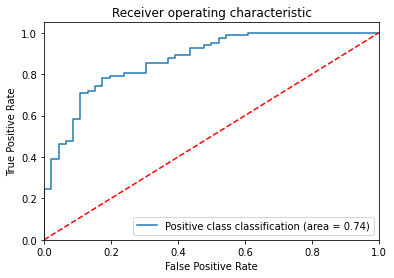

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        46
           1       0.80      0.85      0.83        82

    accuracy                           0.77       128
   macro avg       0.76      0.74      0.75       128
weighted avg       0.77      0.77      0.77       128



In [55]:
clf = MLPClassifier(max_iter=3000, solver='adam', hidden_layer_sizes=(50,20))
fit_clf_and_show_ROC(clf, X[important_features], Y, VALIDATION_SPLIT=0.2)